# Software blinding test for Muon g-2 experiment

## 1. Import some important libraries here

In [1]:
import math
from Blinders import Blinders
from Blinders import FitType
import ROOT as r

#r.gROOT.Macro( '../rootlogon.C' ) if you have a rootlogon.C
r.gStyle.SetOptFit(1111)
c = r.TCanvas('c1','c1',1200,600)

Welcome to JupyROOT 6.24/00


In [ ]:
## 2. Get the g-2 blinder here

In [2]:
# unblinded fit, only do this before going to Elba, Italy 2018
#myBlinder = Blinders(FitType.Omega_a) # or Blinder(FitType.Omega_p)

# blinded instance
getBlinded = Blinders(FitType.Omega_a, 'Kim is having fun getting his omega_a blinded!')

 + ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ +
 +                                                                      +
 +           You have chose to blind your fitting according to          +
 +                omega_ref * (1 + (R +/- deltaR) *10^{-6})             +
 +                                                                      +
 + ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ +


## 3. Create your own blinded wiggle function

In [3]:
def blinded_wiggle(x, p):
    norm  = p[0]
    life  = p[1]
    asym  = p[2]
    R     = p[3]
    phi   = p[4]
    
    time  = x[0]
    omega = getBlinded.paramToFreq(R)
#    omega = myBlinder.paramToFreq(R) unblind version
    
    return norm * math.exp(-time/life) * (1 - asym*math.cos(omega*time + phi))

## 4. Read some real data here

In [4]:
cluster_tree = r.TChain('clusterTree/clusters') # using the output of gm2calo::ClusterTree analyzer
cluster_tree.Add('gm2offline_example.root')

1

## 5. Make a wiggle plot

In [5]:
cluster_tree.Draw('time*1.25/1000>>wiggle(2000,0,300)','energy>1800 && energy < 10000','goff')
wiggle = r.gDirectory.Get('wiggle')

## 6. Set some initial parameters and name them

In [6]:
func = r.TF1("func", blinded_wiggle, 30,280,5)
func.SetParNames('N','#tau','A','R','#phi')
func.SetParameters(1500,64.4,0.4,0,0)
func.SetLineColor(2)
func.SetNpx(1000)

In file included from input_line_88:1:
In file included from /Applications/root_v6.24.00/include/CPyCppyy/API.h:30:
In file included from /usr/local/Cellar/python@2/2.7.16/Frameworks/Python.framework/Versions/2.7/include/python2.7/Python.h:88:
/usr/local/Cellar/python@2/2.7.16/Frameworks/Python.framework/Versions/2.7/include/python2.7/unicodeobject.h:534:5: warning: 'register' storage class specifier is deprecated and incompatible with C++17 [-Wdeprecated-register]
    register PyObject *obj,     /* Object */
    ^~~~~~~~~
/usr/local/Cellar/python@2/2.7.16/Frameworks/Python.framework/Versions/2.7/include/python2.7/unicodeobject.h:553:5: warning: 'register' storage class specifier is deprecated and incompatible with C++17 [-Wdeprecated-register]
    register PyObject *obj      /* Object */
    ^~~~~~~~~
/usr/local/Cellar/python@2/2.7.16/Frameworks/Python.framework/Versions/2.7/include/python2.7/unicodeobject.h:575:5: warning: 'register' storage class specifier is deprecated and incompat

## 7. Here comes our blinded fit!

 FCN=1522.67 FROM MINOS     STATUS=SUCCESSFUL     36 CALLS         683 TOTAL
                     EDM=2.81521e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  N            4.77169e+01   9.26595e-01  -6.63029e-03   5.88881e-05
   2  #tau         6.15943e+01   7.56313e-01   2.24666e-03   2.50752e-05
   3  A            4.11840e-01   1.22284e-02  -1.74446e-04   2.80763e-03
   4  R           -1.42957e+02   4.83803e+02   2.81540e-01   6.73906e-07
   5  #phi        -1.12800e+00   6.68645e-02   6.68645e-02   1.16164e-02


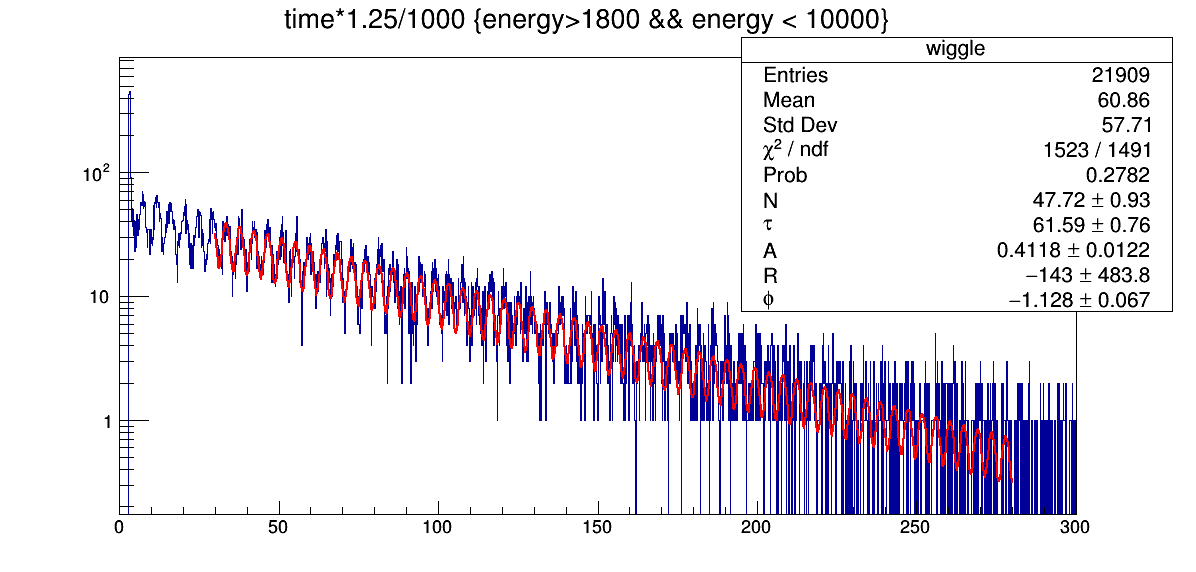

In [7]:
wiggle.Draw()
wiggle.Fit('func','REM')
c.Draw()
c.SetLogy()